## Neural Network model (limited data)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('../dataset-processed//pre-processed-01.csv')
print("Numero di esempi: ", len(dataset))
dataset.head()

Numero di esempi:  11905


,hashtag,tag,caption,is_video,n_comment,n_likes,target,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6
0,0,0,52,0,0.000116,0.042888,1,0,0,0,1,0,0
1,0,0,44,0,0.000174,0.057932,1,0,1,0,0,0,0
2,2,4,16,1,0.000044,0.019899,1,0,0,1,0,0,0
3,0,0,1,1,0.000256,0.042174,1,0,1,0,0,0,0
4,0,1,26,0,0.000099,0.042953,1,1,0,0,0,0,0


### Valutazione caratteristiche dataset e bilanciamento

In [3]:
dataset['target'].value_counts()

1    11645
0      260
Name: target, dtype: int64

In [4]:
g = dataset.groupby('target')
balanced_dataset = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
balanced_dataset['target'].value_counts()

1    260
0    260
Name: target, dtype: int64

In [5]:
balanced_dataset.head(2)

hashtag  tag  caption  is_video  n_comment   n_likes  target  \
target                                                                   
0      0        0    1        8         0   0.000030  0.005525       0   
       1        5    1       64         1   0.000033  0.004470       0   

          timestamp_1  timestamp_2  timestamp_3  timestamp_4  timestamp_5  \
target                                                                      
0      0            0            0            0            0            1   
       1            1            0            0            0            0   

          timestamp_6  
target                 
0      0            0  
       1            0

In [6]:
balanced_dataset.loc[0].head()

,hashtag,tag,caption,is_video,n_comment,n_likes,target,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6
0,0,1,8,0,0.000030,0.005525,0,0,0,0,0,1,0
1,5,1,64,1,0.000033,0.004470,0,1,0,0,0,0,0
2,1,1,18,1,0.000082,0.016811,0,0,0,1,0,0,0
3,4,0,13,1,0.000122,0.023835,0,0,0,0,0,1,0
4,2,0,72,0,0.000026,0.012454,0,0,0,0,0,0,0


In [7]:
balanced_dataset.loc[1].head()

,hashtag,tag,caption,is_video,n_comment,n_likes,target,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6
0,0,0,30,0,0.001506,0.080660,1,0,0,1,0,0,0
1,0,0,4,0,0.000035,0.136012,1,0,0,0,0,0,1
2,0,1,114,0,0.000008,0.005378,1,0,0,1,0,0,0
3,0,0,1,0,0.000151,0.036504,1,0,0,0,0,0,1
4,0,0,12,0,0.001508,0.076669,1,0,0,0,1,0,0


In [8]:
balanced_dataset = pd.concat([balanced_dataset.loc[0], balanced_dataset.loc[1]])

In [9]:
balanced_dataset.head()

,hashtag,tag,caption,is_video,n_comment,n_likes,target,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6
0,0,1,8,0,0.000030,0.005525,0,0,0,0,0,1,0
1,5,1,64,1,0.000033,0.004470,0,1,0,0,0,0,0
2,1,1,18,1,0.000082,0.016811,0,0,0,1,0,0,0
3,4,0,13,1,0.000122,0.023835,0,0,0,0,0,1,0
4,2,0,72,0,0.000026,0.012454,0,0,0,0,0,0,0


In [10]:
balanced_dataset['target'].value_counts()

1    260
0    260
Name: target, dtype: int64

##### Setto il dataset bilanciamo come dataset da utlizzare
Commentare la riga sotto se necessario.

In [11]:
dataset = balanced_dataset

### Eliminazine delle feature non interessanti

In [12]:
# axis = 1 perchè guardo alle colonne
X = dataset.drop(labels=['target'], axis = 1)
y = dataset['target']

In [13]:
X.head()

,hashtag,tag,caption,is_video,n_comment,n_likes,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6
0,0,1,8,0,0.000030,0.005525,0,0,0,0,1,0
1,5,1,64,1,0.000033,0.004470,1,0,0,0,0,0
2,1,1,18,1,0.000082,0.016811,0,0,1,0,0,0
3,4,0,13,1,0.000122,0.023835,0,0,0,0,1,0
4,2,0,72,0,0.000026,0.012454,0,0,0,0,0,0


### Standardizzazione delle feature

In [14]:
from sklearn.preprocessing import StandardScaler

"""
Il parametro 'stratify' permette di splittare tra train e test in modo
che la proporzione di esempi delle varie classi nei due set sia identica
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

scaler = StandardScaler() # applica lo z-score
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
y.value_counts()

1    260
0    260
Name: target, dtype: int64

In [16]:
len(X_train), len(X_test)

(416, 104)

In [17]:
len(y_train), len(y_test)

(416, 104)

In [18]:
y_train.value_counts()

1    208
0    208
Name: target, dtype: int64

In [19]:
y_test.value_counts()

1    52
0    52
Name: target, dtype: int64

### Neural network model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

print(tf.__version__)

2.1.0


In [21]:
# X.shape[1] = 11 (numero di feature presenti)
model = Sequential()
model.add(Dense(X.shape[1], activation="relu", input_dim = X.shape[1])) # input layer quindi serve anche l'input_dim
model.add(Dense(256, activation="relu")) # hidden layer
model.add(Dense(128, activation="relu")) # hidden layer
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics=['accuracy'])
"""
Batch: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

batch_size = 10 corriponde al numero di sample che vengono propagati nella rete 
prima di aggiornare i pesi (usando la discesa del gradiente)

verbose = 1 corrisponde semplicemente ad un tipo di visualizzare che mostra la progress bar durante il fitting
"""
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Train on 416 samples
Epoch 1/10
416/416 [==============================] - 0s 943us/sample - loss: 0.6426 - accuracy: 0.6370
Epoch 2/10
416/416 [==============================] - 0s 160us/sample - loss: 0.5793 - accuracy: 0.7091
Epoch 3/10
416/416 [==============================] - 0s 162us/sample - loss: 0.5512 - accuracy: 0.7260
Epoch 4/10
416/416 [==============================] - 0s 159us/sample - loss: 0.5331 - accuracy: 0.7236
Epoch 5/10
416/416 [==============================] - 0s 161us/sample - loss: 0.5052 - accuracy: 0.7572
Epoch 6/10
416/416 [==============================] - 0s 156us/sample - loss: 0.4786 - accuracy: 0.7548
Epoch 7/10
416/416 [==============================] - 0s 161us/sample - loss: 0.4559 - accuracy: 0.7692
Epoch 8/10
416/416 [==============================] - 0s 180us/sample - loss: 0.4495 - accuracy: 0.7885
Epoch 9/10
416/416 [==============================] - 0s 173us/sample - loss: 0.4325 - accuracy: 0.7981
Epoch 10/10
416/416 [======================

In [23]:
model.save('model.h5')

In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib

In [25]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.7980769230769231

### Confusion matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14489ad30>)

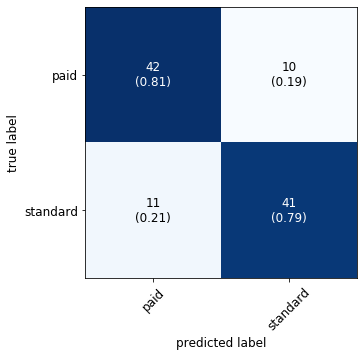

In [26]:
class_names = ['paid', 'standard']
font = {
    #'family': 'Arial',
    # 'family': 'Times New Roman',
    # 'weight': 'normal',
    'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
# show_normed = per mostrare le precisione di ogni cella
plot_confusion_matrix(conf_mat=mat, figsize=(5,5), class_names = class_names, show_normed=True)

https://www.instagram.com/p/B8x6DhbA67a/

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        52
           1       0.80      0.79      0.80        52

    accuracy                           0.80       104
   macro avg       0.80      0.80      0.80       104
weighted avg       0.80      0.80      0.80       104

